In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np
import pandas as pd
from functools import partial

import bases
import eigensolvers
import representations
import utils
import generators

from test_base import TestNDTorus

def get_nd_torus_obs_krylov(n_dim=2, num_col=100):
    frequencies, initial_points = generators.n_torus_initial_points(n=n_dim)
    return utils.generate_krylov(partial(generators.n_torus_evolution_function, frequencies=frequencies), generators.full_state_observable, initial_points, num_col)

In [2]:
kwargs =  {
    'n_iter': 10,
    'n_dim': 3,
    'degree': 100,
    'ncols': 2,
    'input_size': 2,
    'combinations': False
}
kwargs['nrows'] = kwargs['n_dim']
filename = f'test_combinations{kwargs["combinations"]}_deg{kwargs["degree"]}_dim{kwargs["n_dim"]}_iter{kwargs["n_iter"]}'
header = []
for i in range(kwargs['n_dim']):
    header.append(f'non-zero_ratio {i}')
    header.append(f'iterations {i}')

100%|██████████| 10/10 [19:30<00:00, 117.09s/it]


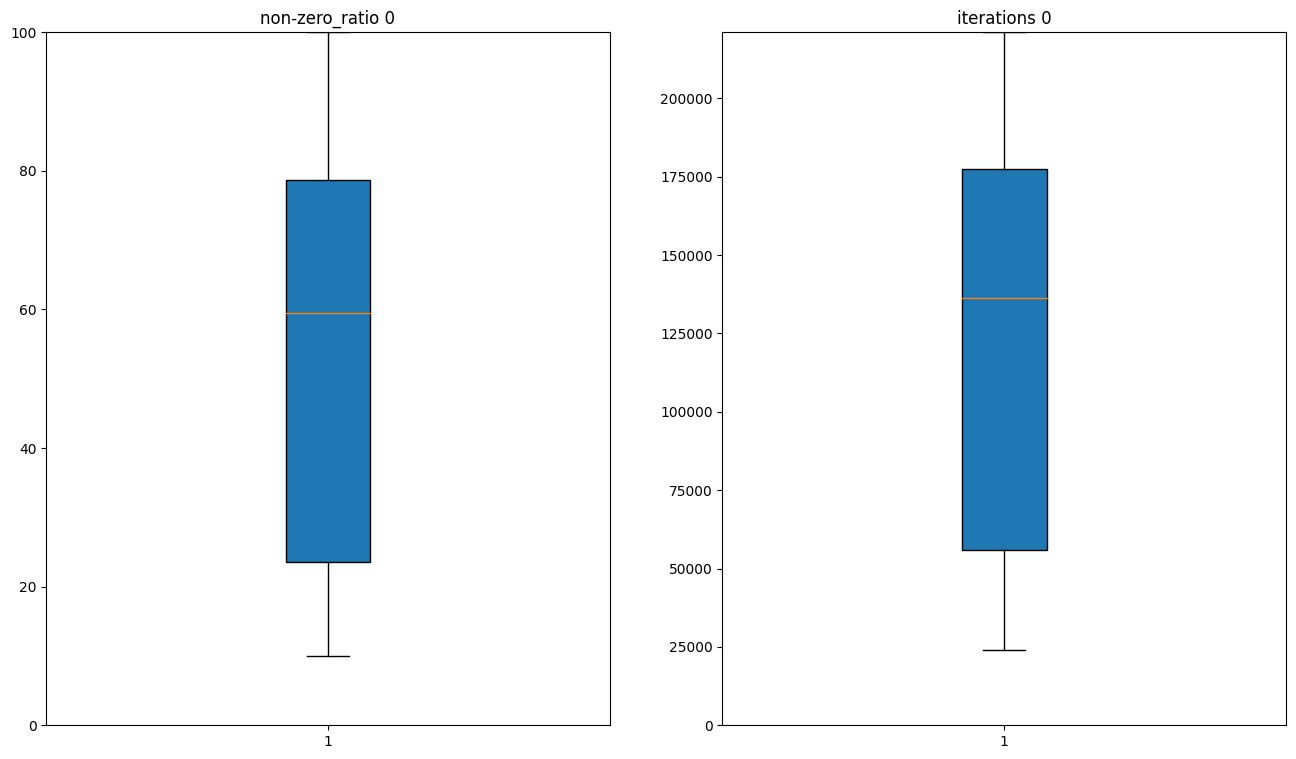

non-zero_ratio 0 mean      54.53, std      30.86, max     100.00, min       9.95
   iterations 0 mean  123710.50, std   67871.23, max  221100.00, min   24152.00


In [3]:
tnd = TestNDTorus(**kwargs)
results = tnd.test_all(filename, header)
# tnd.show_plot(results, header)

In [4]:
tnd.D.shape

(201,)

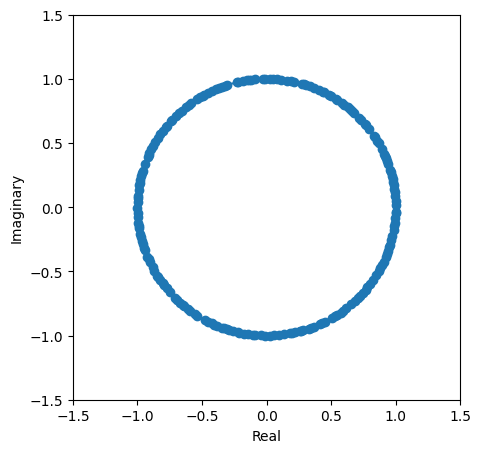

In [5]:
utils.plot_complex_on_unit_circle(tnd.D)

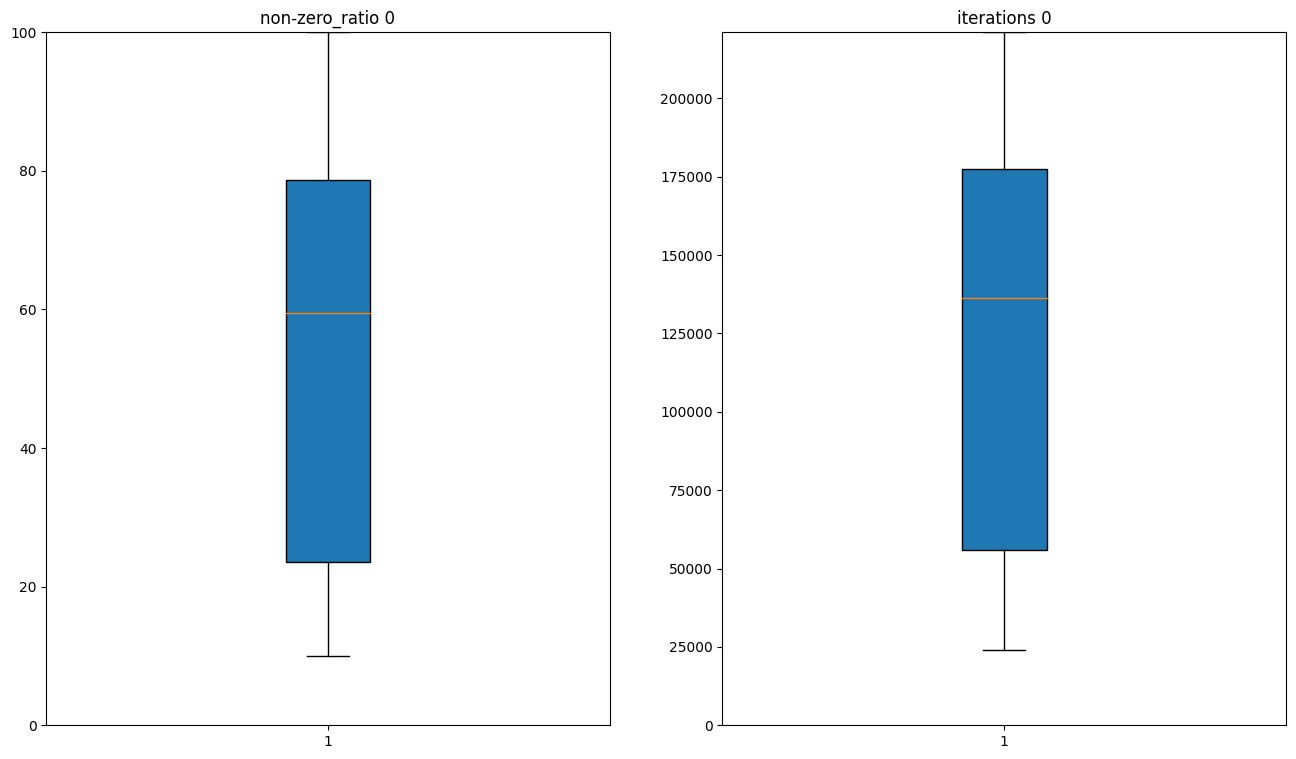

non-zero_ratio 0 mean      54.53, std      30.86, max     100.00, min       9.95
   iterations 0 mean  123710.50, std   67871.23, max  221100.00, min   24152.00


[[56.71641791044776, 130442.0],
 [9.950248756218906, 24152.0],
 [17.412935323383085, 41707.0],
 [87.56218905472637, 195522.0],
 [79.60199004975125, 179302.0],
 [42.28855721393035, 98356.0],
 [76.11940298507463, 171920.0],
 [62.189054726368155, 142225.0],
 [100.0, 221100.0],
 [13.432835820895523, 32379.0]]

In [6]:
tnd.read_and_show_plot(filename)